In [1]:
# pip install Mysql-connector-python

In [2]:
import mysql.connector as conection
import pandas as pd
import mysql
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
mydb = mysql.connector.connect(
    host='34.16.84.34',
    user='root',
    password = '123Qaz456$$D8',
    database='classicmodels')

In [4]:
query = 'select * from classicmodels.payments;'

In [5]:
df = pd.read_sql(query,mydb)
mydb.close()

C:\Users\JORGE\AppData\Local\Temp\ipykernel_29972\1494652780.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,mydb)


In [6]:
df

,customerNumber,checkNumber,paymentDate,amount
0,103,HQ336336,2004-10-19,6066.78
1,103,JM555205,2003-06-05,14571.44
2,103,OM314933,2004-12-18,1676.14
3,112,BO864823,2004-12-17,14191.12
4,112,HQ55022,2003-06-06,32641.98
...,...,...,...,...
268,495,BH167026,2003-12-26,59265.14
269,495,FN155234,2004-05-14,6276.60
270,496,EU531600,2005-05-25,30253.75
271,496,MB342426,2003-07-16,32077.44


In [7]:
df.shape

(273, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customerNumber  273 non-null    int64  
 1   checkNumber     273 non-null    object 
 2   paymentDate     273 non-null    object 
 3   amount          273 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 8.7+ KB


In [9]:
df.columns

Index(['customerNumber', 'checkNumber', 'paymentDate', 'amount'], dtype='object')

In [10]:
df.describe()

,customerNumber,amount
count,273.000000,273.000000
mean,271.194139,32431.645531
std,120.069507,20997.116917
min,103.000000,615.450000
25%,161.000000,16909.840000
50%,250.000000,32077.440000
75%,363.000000,45352.470000
max,496.000000,120166.580000


In [11]:
# pip install google-cloud-storage

In [12]:
from google.cloud import storage
import os
from io import StringIO

In [13]:
os.environ["GOOGLE_APPLICATIOn_CREDENTIALS"] = 'C:/Users/JORGE/Downloads/credenciales.json'

In [14]:
storage_client = storage.Client()

In [15]:
bucket_name = 'cloudstoagereingesta'
blob_name = '2008.csv'

In [16]:
bucket = storage_client.get_bucket(bucket_name)
blob = bucket.blob(blob_name)

In [17]:
data = blob.download_as_text()

In [18]:
df = pd.read_csv(StringIO(data),sep=",")

In [19]:
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009723,2008,12,13,6,1002.0,959,1204.0,1150,DL,1636,...,6.0,45.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7009724,2008,12,13,6,834.0,835,1021.0,1023,DL,1637,...,5.0,23.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7009725,2008,12,13,6,655.0,700,856.0,856,DL,1638,...,24.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,...,13.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [20]:
df[['Year',"Month","DayofMonth"]] = df[['Year',"Month","DayofMonth"]].astype(str)

In [21]:
df['concatenadas'] = df['Year'].astype(str).str.cat([df['Month'], df['DayofMonth']], sep='-')


In [22]:
df['concatenadas'] = pd.to_datetime(df['concatenadas'])

In [23]:
df.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               136246
CRSDepTime                 0
ArrTime               151649
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                83365
ActualElapsedTime     154699
CRSElapsedTime           844
AirTime               154699
ArrDelay              154699
DepDelay              136246
Origin                     0
Dest                       0
Distance                   0
TaxiIn                151649
TaxiOut               137058
Cancelled                  0
CancellationCode     6872294
Diverted                   0
CarrierDelay         5484993
WeatherDelay         5484993
NASDelay             5484993
SecurityDelay        5484993
LateAircraftDelay    5484993
concatenadas               0
dtype: int64

In [24]:
df.Dest.unique()

array(['TPA', 'BWI', 'JAX', 'LAS', 'MCI', 'MCO', 'MDW', 'PHX', 'FLL',
       'PBI', 'RSW', 'HOU', 'BHM', 'BNA', 'IND', 'ORF', 'PHL', 'ABQ',
       'ALB', 'AMA', 'AUS', 'BDL', 'BOI', 'BUF', 'BUR', 'CLE', 'CMH',
       'DEN', 'ELP', 'GEG', 'IAD', 'ISP', 'LAX', 'LBB', 'LIT', 'MAF',
       'MHT', 'MSY', 'OAK', 'OKC', 'OMA', 'ONT', 'PDX', 'PIT', 'PVD',
       'RDU', 'RNO', 'SAN', 'SAT', 'SDF', 'SEA', 'SFO', 'SJC', 'SLC',
       'SMF', 'SNA', 'STL', 'TUL', 'TUS', 'DAL', 'DTW', 'JAN', 'HRL',
       'CRP', 'EWR', 'IAH', 'XNA', 'DCA', 'GSO', 'ROC', 'MYR', 'SYR',
       'ATL', 'SAV', 'RIC', 'COS', 'FAT', 'MRY', 'LGB', 'BFL', 'EUG',
       'ICT', 'MSN', 'CAE', 'DAY', 'BTR', 'TLH', 'DFW', 'LFT', 'PWM',
       'SHV', 'MKE', 'CHS', 'CRW', 'HSV', 'TYS', 'MTJ', 'MGM', 'MFE',
       'MSP', 'GSP', 'GRR', 'MEM', 'BTV', 'CLT', 'BRO', 'CVG', 'LGA',
       'VPS', 'LEX', 'BPT', 'PNS', 'ORD', 'ABE', 'LRD', 'BGR', 'GRK',
       'SRQ', 'LCH', 'AEX', 'AVL', 'GPT', 'MLU', 'MOB', 'BOS', 'DSM',
       'CHA', 'CLL',

<Axes: xlabel='Dest', ylabel='AirTime'>

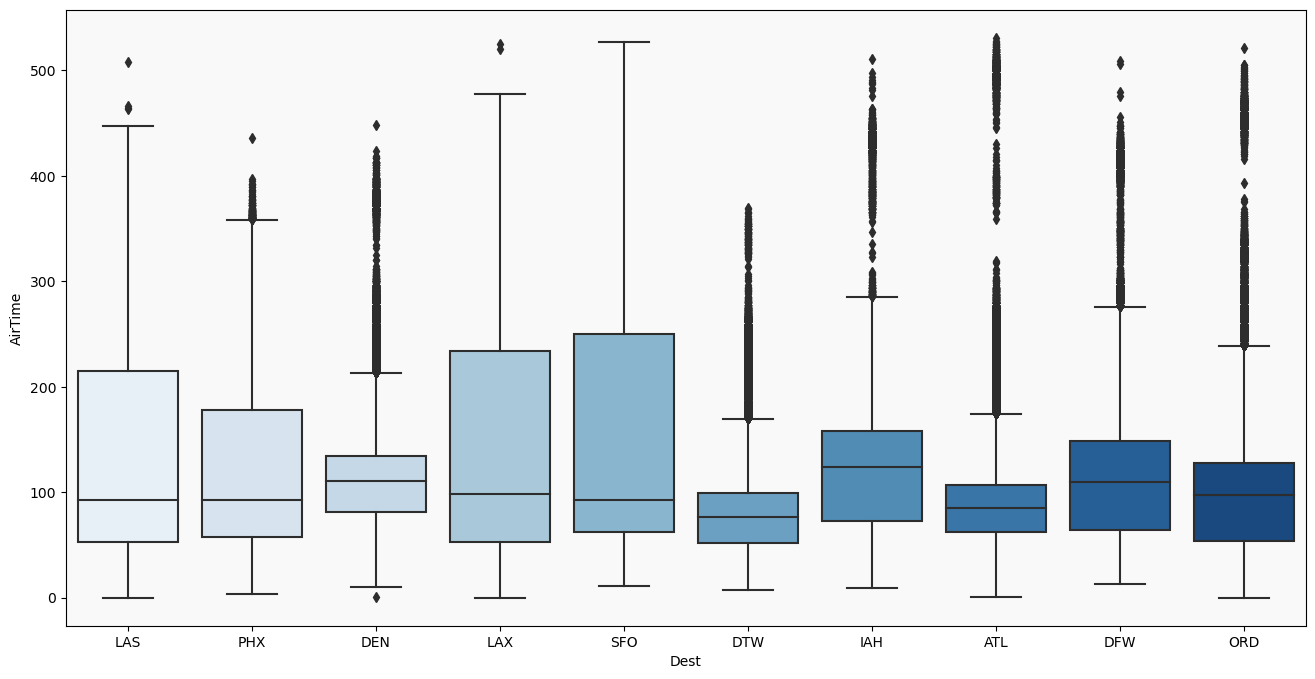

In [25]:
plt.rcParams['axes.facecolor'] = '#f9f9f9'

tiempo_volando = df.AirTime.unique()
destinos_mas_visitados = df.Dest.value_counts().index[0:10]
filtro_destinos = df[df["Dest"].isin(destinos_mas_visitados)]
plt.figure(figsize= (16,8))
sns.boxplot(data = filtro_destinos , x = "Dest", y = "AirTime", palette="Blues")

<BarContainer object of 32 artists>

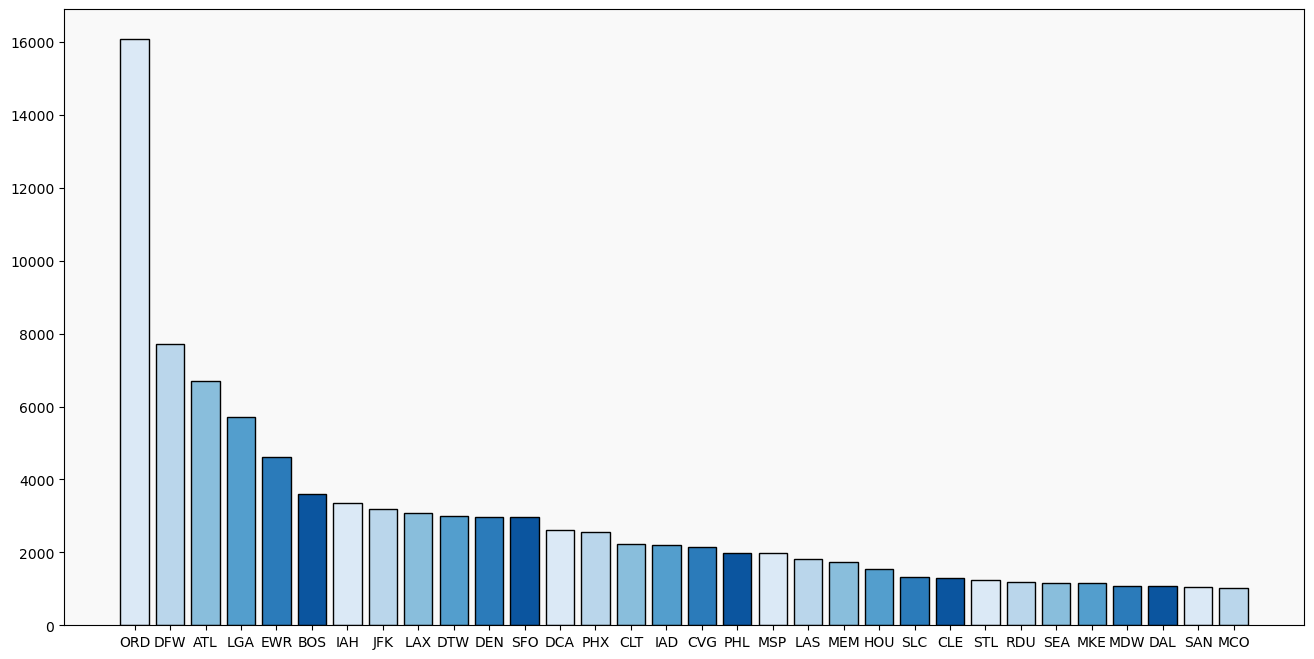

In [26]:
plt.figure(figsize= (16,8))
cancelados = df.loc[df.Cancelled == 1,"Dest"].value_counts()
cancelados_mas_frecuentes = cancelados[cancelados.values>1000]
plt.bar(cancelados_mas_frecuentes.index,cancelados_mas_frecuentes.values, color=sns.color_palette("Blues"),edgecolor='black', linewidth=1)

<BarContainer object of 21 artists>

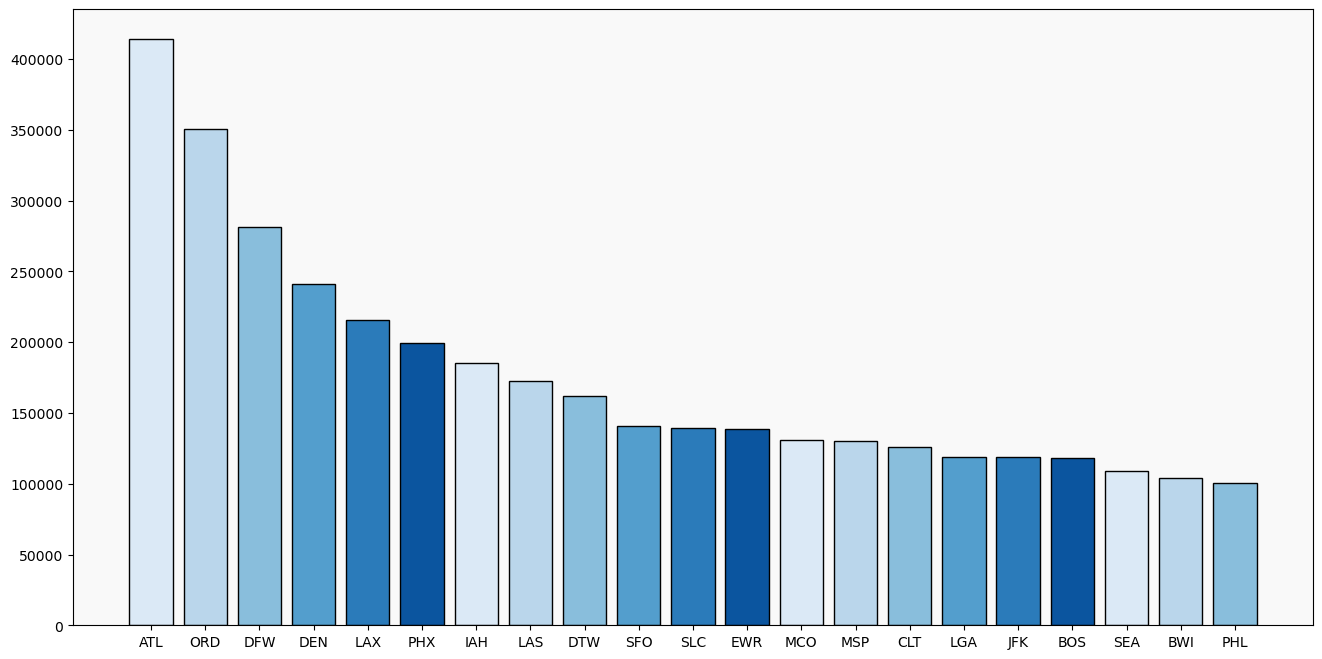

In [27]:
destinos_cantidades = df["Dest"].value_counts()
destinos_cantidades_freq = destinos_cantidades[destinos_cantidades.values>100000]
plt.figure(figsize= (16,8))
plt.bar(destinos_cantidades_freq.index,destinos_cantidades_freq.values, color=sns.color_palette("Blues"),edgecolor='black', linewidth=1)